**Project Yeshurun Shrem. Depression among students.**

I am trying to help the administration understand which students are prone to depression, and whether it's possible to help them or alternatively whether it's better to assume they won't finish their studies and they should find an alternative career.

**Research Questions:**

**Is there a negative correlation between depression and academic success?**
Do students with depression perform worse academically than students without depression in terms of degree completion, number of study hours per day, and cumulative grade point average (CGPA)?
Do we see a decrease in the relative number of individuals with depression at older ages
(implying that those with depression are less likely to continue their studies)?

**Correlation between health anomalies and depression:** 
Are students with depression more likely to have unusual sleep patterns (both more and less sleep)? Are their eating habits different from students without depression? What is the impact of a family history of mental illness on the correlation with depression in students?

**Is there a correlation between stress factors and depression?** 
Are students with financial stress more prone to depression? Is there a correlation between depression and academic stress?

# Chapter 1: Examining the Data

In [1]:
# Load necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Since we will need to calculate the mean multiple times throughout the notebook, and for convenience we'll round the numbers
#so we define this function here and use it throughout the notebook
def round_mean_two_decimals(series):
    return round(series.mean(), 2)

In [2]:
# First import csv file about depression among students and store it as 'student_depression_df'
student_depression_df=pd.read_csv('/kaggle/input/student-depression-dataset/student_depression_dataset.csv')

# See the first and last five rows
student_depression_df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


Where does this dataset come from? We can try to understand from the "City" colunmn which cities the students come from.

In [3]:
student_depression_df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

I copied the cities in the array to Gemini and asked in which country they are located. It replied that all the cities it could identify are in **India**, So we can assume the source of the dataset is India.

In [4]:
# Look at columns types
student_depression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
# See if everything looks normal in the numeric columns
student_depression_df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


Everything looks normal. There are no unreasonable outliers in the 'min' or 'max' rows. However, it's interesting to note that in the 'Depression' column (where a value of 0 indicates the student does not have depression, and 1 indicates they do), about 0.585, or 58.5% of the students identified with depression, a rate much higher than the rate of depression in the general population. This prompts a closer examination of the research methodology and the specific definition of depression employed in this context, which is beyond the scope of this notebook.

In [6]:
# See what's going on with missing values. 
student_depression_df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

We can see there are no missing values. Great! Those indians sure know how to collect data.

# Chapter 2: Depression and Academic Performance

Does depression lead to lower academic achievement? We will use several ways to answer this question.

**1. Do students with depression have less advanced academic degrees?**

In [7]:
# Use map to create a new column: 'Degree_Category', so we'll see what is a student's high education level.
# I used AI chatbot to gather all the degree abbreviations by their categories
def categorize_degree(degree):
    """
    Convert a degree abbreviation to a category: None, First, Second, Third, Others.
    """
    if degree in "'Class 12'":
        return 'None'
    elif degree in ['BA', 'BSc', 'BCA', 'B.Ed', 'LLB', 'BE', 'BHM', 'B.Com', 'B.Arch', 'B.Tech', 'BBA', 'B.Pharm']:
        return 'First'
    elif degree in ['MA', 'MSc', 'MCA', 'M.Ed', 'M.Pharm', 'M.Tech', 'MBA', 'M.Com', 'LLM', 'ME', 'MHM']:
        return 'Second'
    elif degree == 'PhD':
        return 'Third'
    else:
        return 'Others'

# Use the map to create a new column 'Degree_category'
student_depression_df['Degree_Category'] = student_depression_df['Degree'].map(categorize_degree)

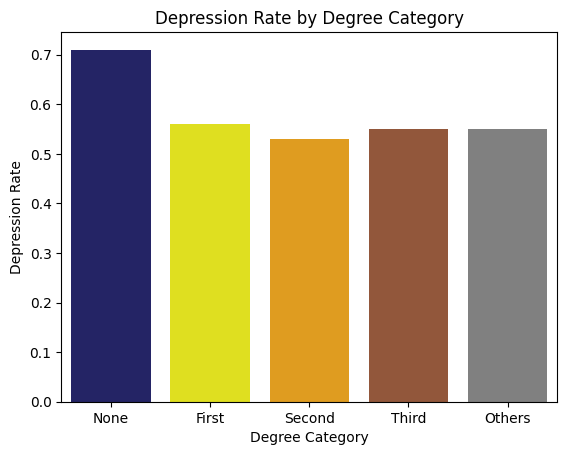

In [8]:
# Group by degree category and show the depression ratio (The mean of the 'Depression' column)
degree_category_student_depression_df=student_depression_df.groupby('Degree_Category')['Depression'].agg(round_mean_two_decimals).reset_index()

# Let's order the categories logically and give each one a color
ordered_categories = ['None', 'First', 'Second', 'Third', 'Others']
rainbow_colors_manual = ['midnightblue', 'yellow', 'orange', 'sienna', 'grey']

# Create and show the plot
sns.barplot(data=degree_category_student_depression_df,
            x='Degree_Category',
            y='Depression',
            order=ordered_categories,
            palette=rainbow_colors_manual)
plt.title('Depression Rate by Degree Category')
plt.xlabel('Degree Category')
plt.ylabel('Depression Rate')
plt.show()

We can see that the 'None' category has a higher depression rate, and there's almost no difference between the First, Second, Third, and Others degree categories.

**2. Do students with depression study fewer hours per day? Let's investigate.**



To perform this task, we will need to use the 'Work/Study Hours' column. However, what does it really reflect—study hours or work hours? Is there a significant number of students who work?

In [9]:
percentage_not_students = round((1 - student_depression_df['Profession'].value_counts(normalize=True).get('Student', 0)) * 100, 1)
print(f"Percentage of working people in the dataframe is: {percentage_not_students}%")

Percentage of working people in the dataframe is: 0.1%


The amount is very low, so here, I'm also referring to the 'Work/Study Hours' column as just 'Study Hours'.

The correlation between work/study Hours and deprssion rate is 0.98


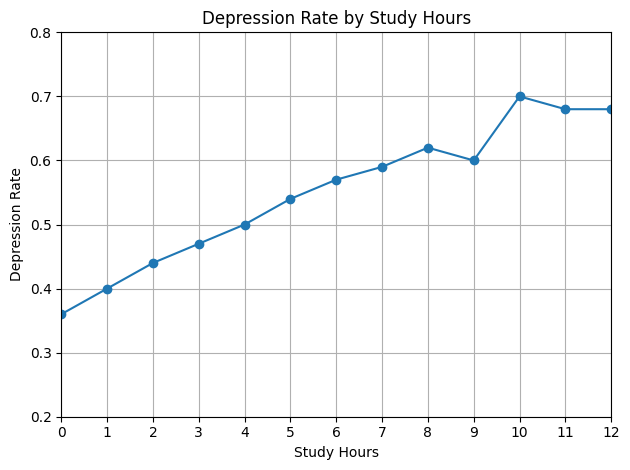

In [10]:
# Group by 'Work/Study Hours' and calculate the mean
student_depression_df_study=student_depression_df.groupby('Work/Study Hours')['Depression'].agg(round_mean_two_decimals).reset_index()

# Since we have two numeric variables, we can calculate the correlation like this:
correlation = student_depression_df_study['Work/Study Hours'].corr(student_depression_df_study['Depression'])
print('The correlation between work/study Hours and deprssion rate is', round(correlation, 2))

# Create and show the plot
plt.plot(student_depression_df_study['Work/Study Hours'], student_depression_df_study['Depression'], marker='o', linestyle='-')
plt.title('Depression Rate by Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Depression Rate')
plt.xticks(range(0, 13))
plt.yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
plt.grid(True)
plt.xlim(0, 12)
plt.ylim(0.2, 0.8)
plt.tight_layout()
plt.show()

The theory that a notable negative correlation would be seen was disproven. In fact, we can see that there is a very strong positive correlation. Therefore, it can be said that students with depression invest not less time in their studies than other students but more. That's interesting.

**3. Are students with depression affected in terms of their grades?**

In [11]:
# Group by cumulative grades and show depression rate for grades groups
student_depression_df_CGPA = student_depression_df.groupby('CGPA')['Depression'].mean().reset_index()

# Calculate the correlation
new_correlation_CGPA = student_depression_df_CGPA['CGPA'].corr(student_depression_df_CGPA['Depression'])
print('The correlation between CGPA and deprssion rate is', round(new_correlation_CGPA, 2))

The correlation between CGPA and deprssion rate is 0.14


We want to visualize the correlation but this time a line plot won't do it, because if we'll group by CGPA we'll have hundreds of groups. So first I round the CGPA values to 0.2, and then group them. Still we'll have dozens of groups, so I use a scatter plot, and not a line plot. The size of the points shows how many students are in the rounded CGPA group.

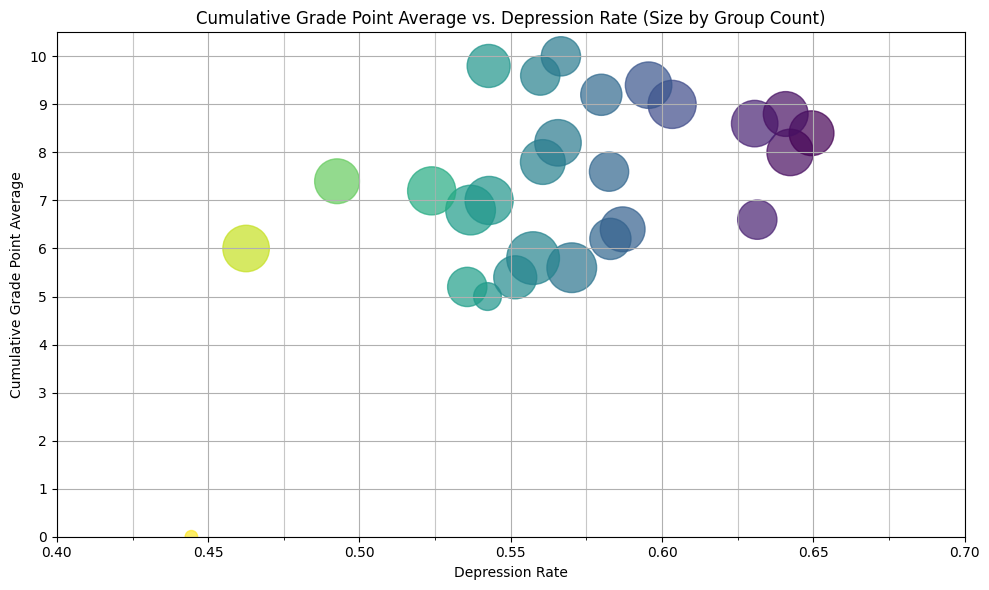

In [12]:
# Round the grades to 0.2 to create more clear grades groups into a new column
student_depression_df_CGPA['CGPA_Rounded'] = student_depression_df_CGPA['CGPA'].apply(lambda x: np.round(x / 0.2) * 0.2)

# Group again by CGPA_Rounded and count the size of each group, count the number of students in each group
grouped_rounded_df_with_size = student_depression_df_CGPA.groupby('CGPA_Rounded').agg(
    Depression=('Depression', 'mean'),
    Size=('CGPA', 'count')
).reset_index()

# Prepare data for scatter plot
cgpa_rounded_sized = grouped_rounded_df_with_size['CGPA_Rounded']
depression_rate_sized = grouped_rounded_df_with_size['Depression']
point_sizes = grouped_rounded_df_with_size['Size'] * 80  # Adjust multiplier as needed

# Create the Matplotlib scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(depression_rate_sized, cgpa_rounded_sized, s=point_sizes, c=depression_rate_sized, cmap='viridis_r', alpha=0.7)

plt.title('Cumulative Grade Point Average vs. Depression Rate (Size by Group Count)')
plt.ylabel('Cumulative Grade Point Average')
plt.xlabel('Depression Rate')
plt.yticks(np.arange(0, 10.5, 1))
plt.ylim(0, 10.5)
plt.xlim(0.4, 0.7)

# Define x-axis ticks for grid and labels
major_xticks = np.arange(0.4, 0.7 + 0.05, 0.05)
minor_xticks = np.arange(0.4, 0.7 + 0.025, 0.025)
plt.xticks(major_xticks)
plt.xticks(minor_xticks, minor=True)
plt.grid(axis='x', which='minor', linestyle='-', alpha=0.7)
plt.grid(axis='x', which='major', linestyle='-')

# y-axis grid
plt.grid(axis='y', which='major')
plt.tight_layout()
plt.show()

No significant correlation here. So we can say that students with depression receive similar grades to students without depression.

**4. Does the proportion of individuals with depression decreases as age increases?** If so, this could be explained by the theory that a person with depression is more likely to drop out of higher education than a student without depression.

In [13]:
# We group the students by their age and compute the depression rate, and the numbers of students in each age group
student_depression_df.groupby('Age')['Depression'].agg(Mean='mean', Count='count')

,Mean,Count
Age,,
18.0,0.766226,1587
19.0,0.705128,1560
20.0,0.705856,2237
21.0,0.677289,1726
22.0,0.604310,1160
23.0,0.638906,1645
24.0,0.668291,2258
25.0,0.606502,1784
26.0,0.574026,1155


We can observe a clear trend for the rate of depression among students to decrease as age increases. However, due to the small number of students in the older age groups, the pattern is less consistent. Therefore, we will combine all students between 34 and 59 into a single group, labeled as 34 (I chose to use 34 rather than '34+' to avoid changing the column type from float to string).

In [14]:
# We'll copy the original DataFrame
student_depression_df_united_olds=student_depression_df

# Use a map with a lambda function: keep original ages if below 34, otherwise set to 34.
student_depression_df_united_olds['Age_United']=student_depression_df_united_olds['Age'].map(lambda age: age if age < 34 else 34)

# Now we'll group by 'Age_United' again and see the result
grouped_student_depression_df_united_olds = student_depression_df_united_olds.groupby('Age_United')['Depression'].agg(round_mean_two_decimals).reset_index()
grouped_student_depression_df_united_olds

,Age_United,Depression
0,18.0,0.77
1,19.0,0.71
2,20.0,0.71
3,21.0,0.68
4,22.0,0.60
5,23.0,0.64
6,24.0,0.67
7,25.0,0.61
8,26.0,0.57
9,27.0,0.61


The correlation between age and deprssion rate is -0.9


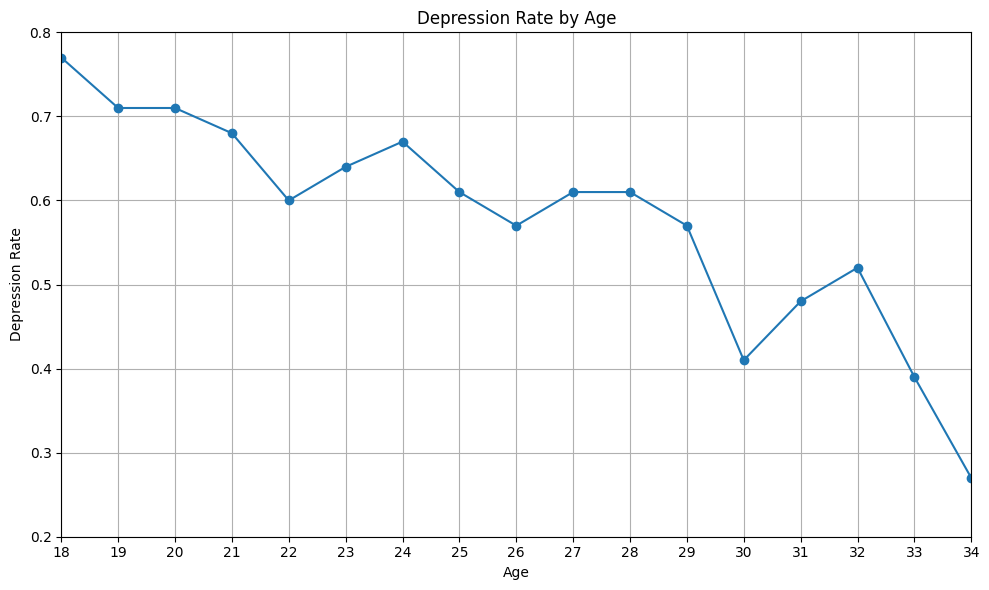

In [15]:
# That's better. Let's calculate the correlation...
age_dep_correlation = grouped_student_depression_df_united_olds['Age_United'].corr(grouped_student_depression_df_united_olds['Depression'])
print('The correlation between age and deprssion rate is', round(age_dep_correlation, 2))

# ...and create the plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_student_depression_df_united_olds['Age_United'], grouped_student_depression_df_united_olds['Depression'], marker='o', linestyle='-')
plt.title('Depression Rate by Age')
plt.xlabel('Age')
plt.ylabel('Depression Rate')
plt.xticks(range(18, 35))
plt.yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
plt.grid(True)
plt.xlim(18, 34)
plt.ylim(0.2, 0.8)
plt.tight_layout()
plt.show()


This time there is a negative correlation between age and rate of depression, as we suspected.

However, we should be skeptical before concluding that the reason for the decrease in the ratio of students with depression to students without depression is the dropout of students with depression. There may be other explanations. In any case, there is a clear and undeniable finding here that deserves to be investigated.

# Chapter 3: Health and Depression

**5. Are the sleeping habits of students with depression different** from the sleeping habits of other students?

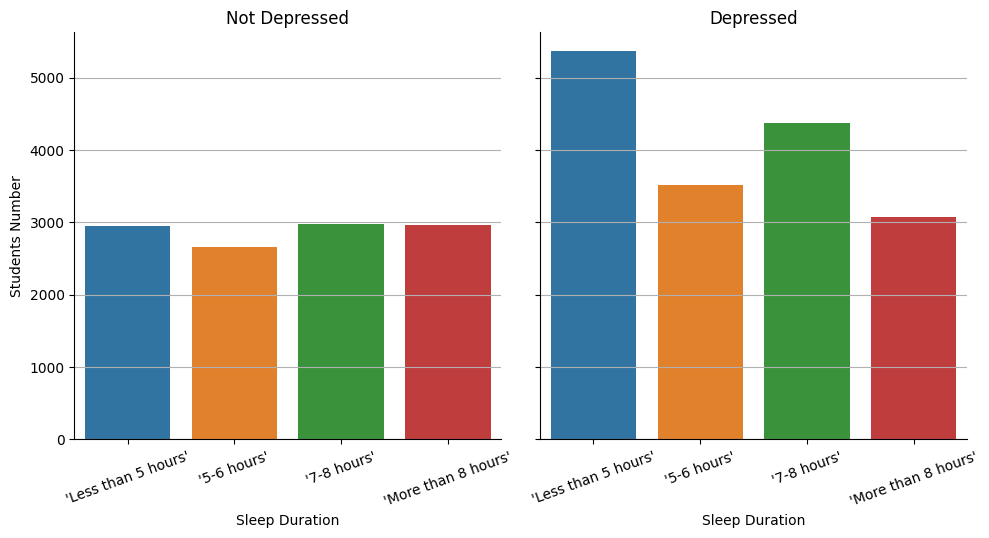

In [16]:
# I want to show two bar plots side by side, one for 'Depressed' and one for 'Not Depressed'. 
# We want to set the bars in reasonable order
ordered_categories=["'Less than 5 hours'", "'5-6 hours'", "'7-8 hours'", "'More than 8 hours'"]


g = sns.catplot(
    data=student_depression_df,
    col='Depression',
    col_wrap=2,
    x='Sleep Duration',
    kind='count',
    order=ordered_categories
)

# Make it more easy to read
g.axes[1].set_title('Depressed')
g.axes[0].set_title('Not Depressed')
g.set_axis_labels("Sleep Duration", "Students Number")
g.set_xticklabels(rotation=20)
g.axes[0].grid(axis='y')
g.axes[1].grid(axis='y')
plt.show()

We can see that depressed students have a tendency to sleep less than 5 hours, and besides that, the difference is not significant.

**6. Are the eating habits of students with depression** significantly different from the eating habits of other students? Let's find out.


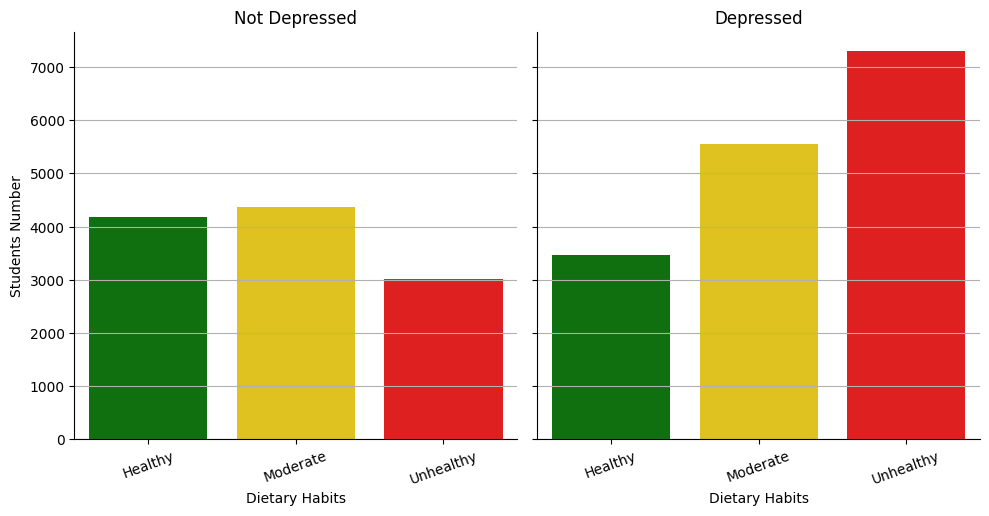

In [17]:
# We want to set the bars in reasonable order and choose colors that match the data
ordered_categories=["Healthy", "Moderate", "Unhealthy"]
color_map = {'Healthy': 'green', 'Moderate': 'gold', 'Unhealthy': 'red'}

g = sns.catplot(
    data=student_depression_df,
    col='Depression',
    col_wrap=2,
    x='Dietary Habits',
    kind='count',
    order=ordered_categories,
    palette=color_map
)

# Make it more easy to read
g.axes[1].set_title('Depressed')
g.axes[0].set_title('Not Depressed')
g.set_axis_labels("Dietary Habits", "Students Number")
g.set_xticklabels(rotation=20)
g.axes[0].grid(axis='y')
g.axes[1].grid(axis='y')
plt.show()

It looks like we're onto something! While among students without depression, there are more students who eat healthily than students who eat unhealthily, with the main group being those whose diet is 'Moderate'. Among students with depression, the majority eat unhealthily; in fact, the number of students with depression who eat unhealthily is more than double the number of those who eat healthily. Is there a way to help them eat more healthily?

**7. "All in the family?" Is there a correlation between a family history of mental illness and the rate of depression?**

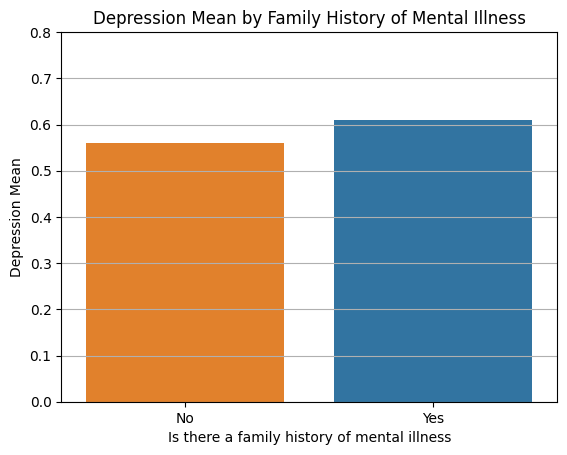

In [18]:
# Let's group by 'Family History of Mental Illness' and calculate the deprssion rate
family_student_depression_df = student_depression_df.groupby('Family History of Mental Illness')['Depression'].agg(round_mean_two_decimals).reset_index()

sns.barplot(data=family_student_depression_df,
            x='Family History of Mental Illness',
            y='Depression',
            palette={'Yes': 'C0', 'No': 'C1'}) # אפשר להגדיר צבעים אם רוצים
plt.title('Depression Mean by Family History of Mental Illness')
plt.xlabel('Is there a family history of mental illness')
plt.ylabel('Depression Mean')
plt.ylim(0.0, 0.8)
plt.grid(axis='y')
plt.show()

Well, we can see that there is a small impact of a family history of mental illness on the rate of depression, but I personally thought the difference would be bigger.

# Chapter 4: Stress, Pressure and Depression

**8. Is there any correlation between Academic Pressure and depression?**

The correlation between academic pressure and deprssion rate is 0.86


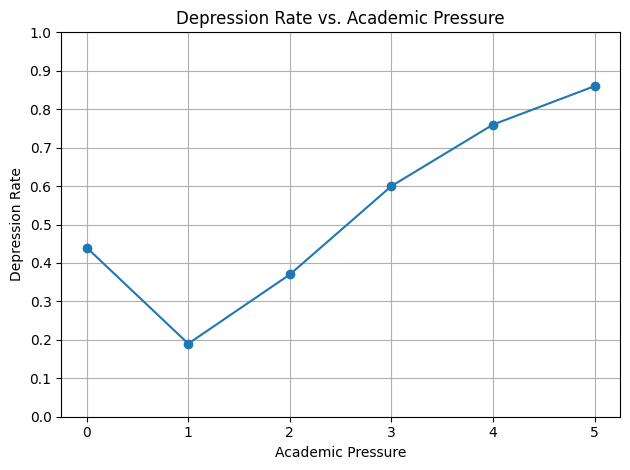

In [19]:
# As usual, we'll group by the 'Academic Pressure' column and show the depression rate
student_depression_df_pressure=student_depression_df.groupby('Academic Pressure')['Depression'].agg(round_mean_two_decimals).reset_index()

# Calculate the correlation
pressure_correlation = student_depression_df_pressure['Academic Pressure'].corr(student_depression_df_pressure['Depression'])
print('The correlation between academic pressure and deprssion rate is', round(pressure_correlation, 2))

# And show the plot
plt.plot(student_depression_df_pressure['Academic Pressure'], student_depression_df_pressure['Depression'], marker='o', linestyle='-')
plt.title('Depression Rate vs. Academic Pressure')
plt.xlabel('Academic Pressure')
plt.ylabel('Depression Rate')
plt.xticks(student_depression_df_pressure['Academic Pressure'].unique())
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()

The graph looks not consistent. Could it be that those who reported their study stress as 0 are few and therefore don't reflect a meaningful trend?

In [20]:
student_depression_df.groupby('Academic Pressure')['Depression'].count().reset_index()

,Academic Pressure,Depression
0,0.0,9
1,1.0,4801
2,2.0,4178
3,3.0,7462
4,4.0,5155
5,5.0,6296


The answer is Yes. 9 is a very small number, remember our table has 27901 rows. So, it's probably a good idea to remove it so the graph shows more reliable information. This will help us see it better visually and calculate the relationship more accurately.

The correlation between academic pressure and deprssion rate is 0.99


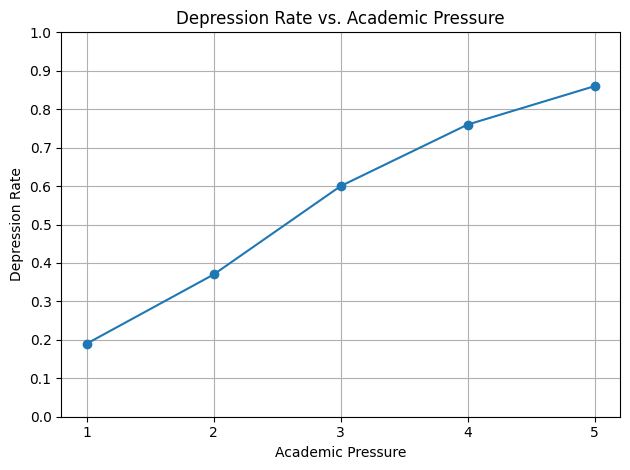

In [21]:
# Get rid of the first row and save it to a new DataFrame
student_depression_df_pressure_no_zero = student_depression_df_pressure.drop(0)

# Correlation
pressure_correlation = student_depression_df_pressure_no_zero['Academic Pressure'].corr(student_depression_df_pressure_no_zero['Depression'])
print('The correlation between academic pressure and deprssion rate is', round(pressure_correlation, 2))

# Plot
plt.plot(student_depression_df_pressure_no_zero['Academic Pressure'], student_depression_df_pressure_no_zero['Depression'], marker='o', linestyle='-')
plt.title('Depression Rate vs. Academic Pressure')
plt.xlabel('Academic Pressure')
plt.ylabel('Depression Rate')
plt.xticks(student_depression_df_pressure_no_zero['Academic Pressure'].unique())
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()

We see here a very strong positive correlation between academic pressure rate. But before we make any statements, it's worth looking at the following data on financial stress:

**9. Does financial stress have an impact on depression**? We'll check that right away. But first, for some reason, even though the content of the 'Financial Stress' column is numerical, its type is defined as object. Let's try to understand why.

In [22]:
print("The type of the 'Financial Stress' column is:", student_depression_df['Financial Stress'].dtype)

The type of the 'Financial Stress' column is: object


In [23]:
# Group by and count the values in 'Financial Stress' column to see what value prevents the column for being numeric and how common it is.
student_depression_df.groupby('Financial Stress')['Financial Stress'].count()

Financial Stress
1.0    5121
2.0    5061
3.0    5226
4.0    5775
5.0    6715
?         3
Name: Financial Stress, dtype: int64

Three times this column was filled with a question mark. A very tiny amount that's just in the way. If we replace it with the average (3.0), it won't have any significant impact on the data.

In [24]:
# Use lambda function to replace all the '?' with '3.0'
student_depression_df['Financial Stress']=student_depression_df['Financial Stress'].map(lambda num: '3.0' if num == '?' else num)

# And check again
student_depression_df.groupby('Financial Stress')['Financial Stress'].count()

Financial Stress
1.0    5121
2.0    5061
3.0    5229
4.0    5775
5.0    6715
Name: Financial Stress, dtype: int64

In [25]:
# Good. Now convert the column type to numeric type
student_depression_df['Financial Stress'] = pd.to_numeric(student_depression_df['Financial Stress'])
print("The type of the 'Financial Stress' column is:", student_depression_df['Financial Stress'].dtype)

The type of the 'Financial Stress' column is: float64


Great. Now we'll calculate the correlation and use a line graph to illustrate the impact of financial stress on the rate of depression.

The correlation between financial stress and deprssion rate is 0.998


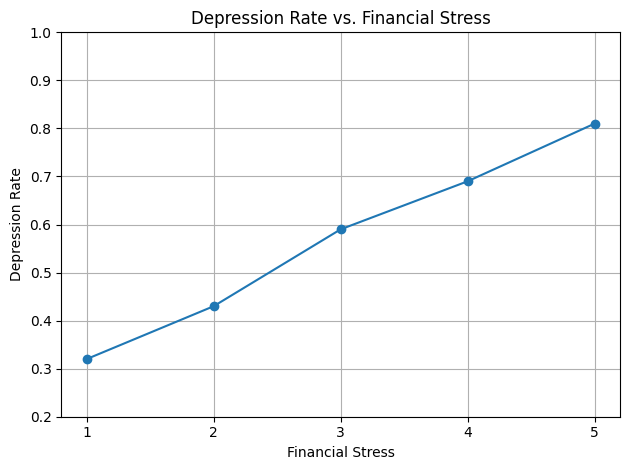

In [26]:
# Group
financial_category_student_depression_df=student_depression_df.groupby('Financial Stress')['Depression'].agg(round_mean_two_decimals).reset_index()

#Correlation
financial_correlation = financial_category_student_depression_df['Financial Stress'].corr(financial_category_student_depression_df['Depression'])
print('The correlation between financial stress and deprssion rate is', round(financial_correlation, 3))


#Plot
plt.plot(financial_category_student_depression_df['Financial Stress'], financial_category_student_depression_df['Depression'], marker='o', linestyle='-')
plt.title('Depression Rate vs. Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Depression Rate')
plt.xticks(range(1, 6))
plt.yticks(np.arange(0.2, 1.1, 0.1))
plt.ylim(0.2, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()

Wow! It was expected that there would be some correlation, but not this much! Almost 100%. Could it be that financial stress is what causes students to be depressed? Now that we see this clear correlation between financial stress and depression, we can come up with new hypotheses. For example, we can suggest the possibility that the reason the rate of depression decreases as age increases (like we saw before) is that people with finanacial stress can't afford an academic lifestyle. We can directly check the correlation between financial stress and age, study hours and unhealthy eating, but this is a subject to a different chapter:

# Chapter 5: What is it all about?

I didn't plan to have a fifth chapter at first, but this last piece of data requires investigation. Is the main thing we can learn from our data is really about the impact of depression? Or perhaps we can say that what can be learned from the data is the impact of financial stress? This could explain certain things that were confusing. For example, we wondered how depression could cause students to study more, but now we can hypothesize that high level of financial stress encourages students to invest more effort.
*Let's run some graphs and see if we can treat financial stress as an influencing factor:*

The correlation between age and financial stress rate is -0.85


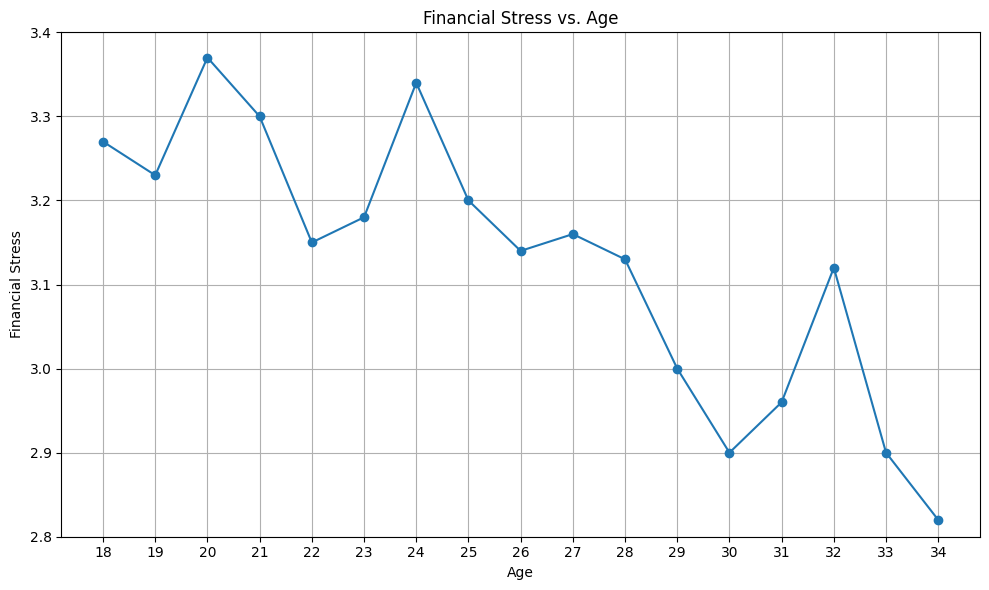

In [27]:
# Now we'll group by age again and see the result based on the DataFrame student_depression_df_united_olds which unites all the older groups age
grouped_student_depression_df_united_olds2 = student_depression_df_united_olds.groupby('Age_United')['Financial Stress'].agg(round_mean_two_decimals).reset_index()

# And calculate the correlation
age_financial_stress_correlation = grouped_student_depression_df_united_olds2['Age_United'].corr(grouped_student_depression_df_united_olds2['Financial Stress'])
print('The correlation between age and financial stress rate is', round(age_financial_stress_correlation, 2))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_student_depression_df_united_olds2['Age_United'], grouped_student_depression_df_united_olds2['Financial Stress'], marker='o', linestyle='-')
plt.title('Financial Stress vs. Age')
plt.xlabel('Age')
plt.ylabel('Financial Stress')
plt.xticks(range(18, 35))
plt.yticks(np.arange(2.8, 3.5, 0.1))
plt.ylim(2.8, 3.4)
plt.grid(True)
plt.tight_layout()
plt.show()


The correlation between work/study Hours and Financial Stress is 0.92


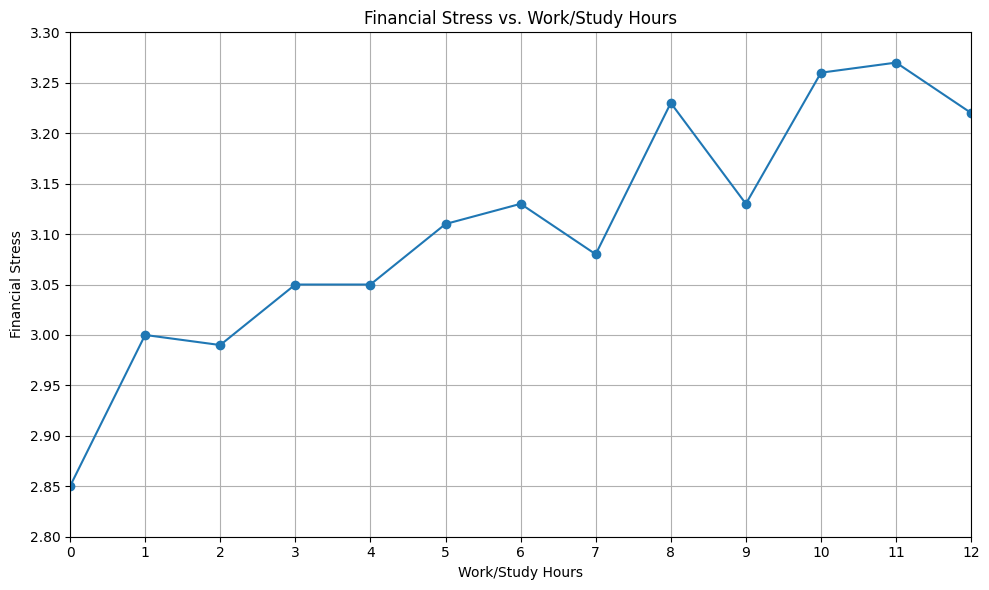

In [28]:
# Group
student_depression_df_study_financial=student_depression_df.groupby('Work/Study Hours')['Financial Stress'].agg(round_mean_two_decimals).reset_index()

# Correlation
correlation_study_financial = student_depression_df_study_financial['Work/Study Hours'].corr(student_depression_df_study_financial['Financial Stress'])
print('The correlation between work/study Hours and Financial Stress is', round(correlation_study_financial, 2))

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(student_depression_df_study_financial['Work/Study Hours'], student_depression_df_study_financial['Financial Stress'], marker='o', linestyle='-')
plt.title('Financial Stress vs. Work/Study Hours')
plt.xlabel('Work/Study Hours')
plt.ylabel('Financial Stress')
plt.xticks(range(0, 13))
plt.yticks(np.arange(2.8, 3.35, 0.05))
plt.ylim(2.8, 3.3)
plt.grid(True)
plt.xlim(0, 12)
plt.tight_layout()
plt.show()


The correlation between work/study Hours and Financial Stress is 0.99


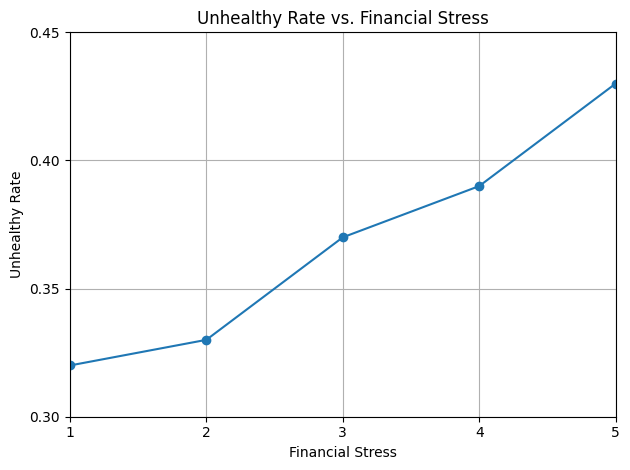

In [29]:
# Create a new DataFrame that grouped by 'Financial Stress' and create columns total students and unhealthy eaters
diet_analysis = student_depression_df.groupby('Financial Stress').agg(
    Total_Students=('Financial Stress', 'size'),
    Unhealthy_Eaters=('Dietary Habits', lambda x: (x == 'Unhealthy').sum())
).reset_index()

# Create a new column to calculate the percentage of unhealthy eaters in every financial stress level
diet_analysis['Unhealthy Rate'] = (diet_analysis['Unhealthy_Eaters'] / diet_analysis['Total_Students'])
diet_analysis['Unhealthy Rate'] = diet_analysis['Unhealthy Rate'].apply(lambda x: round(x, 2))


correlation_diet_financial = diet_analysis['Unhealthy Rate'].corr(diet_analysis['Financial Stress'])
print('The correlation between work/study Hours and Financial Stress is', round(correlation_diet_financial, 2))

# Now visualiation
plt.plot(diet_analysis['Financial Stress'], diet_analysis['Unhealthy Rate'], marker='o', linestyle='-')
plt.title('Unhealthy Rate vs. Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Unhealthy Rate')
plt.xticks(range(1, 6))
plt.yticks(np.arange(0.3, 0.46, 0.05))
plt.ylim(0.3, 0.45)
plt.grid(True)
plt.xlim(1, 5)
plt.tight_layout()
plt.show()

We clearly see that students tend to eat less healthily as their financial stress increases.

# Chapter 6: Summary

"So, what did we have? Let's go back to the research questions:
* Does depression have an impact on academic achievements? We saw **mixed data**."
"Continuing, let's keep translating in the same way:
* Is there a connection between depression and health issues? The **interesting finding** we found was that **students with depression eat much less healthily than students without depression**. From the rest of the data in this chapter, we didn't find anything conclusive.
* Regarding the impact of stress factors on depression, we found **conclusive data** indicating that **financial stress and academic pressure go hand in hand with depression**."
"Throughout the notebook, **we came up with another question**. Can the different data points be explained not only as influencing and being influenced by depression, but also by **financial stress**? The answer that arose is that **this possibility should definitely not be ruled out**."


"**To summarize**, we see that the negative and positive correlations we observed between depression and other factors like study hours per day, older age in academic studies, and unhealthy eating, **could also be explained by financial stress**.

**So what causes what?**

**Are there other factors?**

We answered some questions in this notebook, but **we're left with other questions that also deserve exploring!**"